# Dependencies

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Review and Cleaning

In [2]:
file = "Resources/cleaned_drug_data.csv"
df = pd.read_csv(file)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,illegal_score_sum,legal_score_sum,illegal_use,legal_use
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,1,0,1,0,3,4,1,1
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,3,0,1
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,1,3,1,1
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,3,0,1
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,1,0,0,3,0,1


In [3]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA', 'illegal_score_sum', 'legal_score_sum',
       'illegal_use', 'legal_use'],
      dtype='object')

In [4]:
df = df.drop(["ID", 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA', 'illegal_score_sum', 'legal_score_sum', 'legal_use' ], axis=1)

In [5]:
df.Age.value_counts()

18-24    637
25-34    480
35-44    354
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

Note: There are 6 categories for Age

In [6]:
df.Education.value_counts()

Some college or university, no certificate or degree    503
University degree                                       478
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                  99
Left school at 16 years                                  98
Doctorate degree                                         89
Left school at 17 years                                  29
Left school before 16 years                              28
Name: Education, dtype: int64

Note: There are 9 categories for Education

In [7]:
df.Country.value_counts()

UK                     1043
USA                     551
Other                   118
Canada                   87
Australia                52
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

Note: There are 7 categories for Country

In [8]:
df.Ethnicity.value_counts()

White                1715
Other                  62
Black                  33
Asian                  25
Mixed-White/Black      19
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

Note: There are 7 categories for Ethnicity

In [9]:
df.isnull().sum()

Age            0
Gender         0
Education      0
Country        0
Ethnicity      0
Nscore         0
Escore         0
Oscore         0
AScore         0
Cscore         0
Impulsive      0
SS             0
illegal_use    0
dtype: int64

## Encoding Categorical Columns

In [10]:
# create list of dtypes to help determine unique values
df_cat=df.dtypes[df.dtypes == "object"].index.tolist()

In [11]:
# display number of unique values
df[df_cat].nunique()

Age          6
Gender       2
Education    9
Country      7
Ethnicity    7
dtype: int64

In [12]:
#import onehotencoder
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(df_cat)
encode_df

,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_F,Gender_M,Education_Doctorate degree,Education_Left school at 16 years,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1873,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1874,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Merge to Create One Dataset

In [13]:
# merge original df and encoded and then drop the categorical columns to leave only numerical columns
df_merge = df.merge(encode_df, left_index=True, right_index=True)
df_merge = df_merge.drop(df_cat, axis='columns')
df_merge.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,illegal_use,Age_18-24,Age_25-34,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Split Data into Target and Features

In [14]:
# create dataframe for variable X
df_pre = df_merge.drop("illegal_use", axis = 1)

In [15]:
# split data
X = df_pre
y = df["illegal_use"]

## Train Test Split and Scale Data

In [16]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [17]:
# scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8272921108742004
Testing Score: 0.8208955223880597


In [20]:
feature_importances = clf.feature_importances_

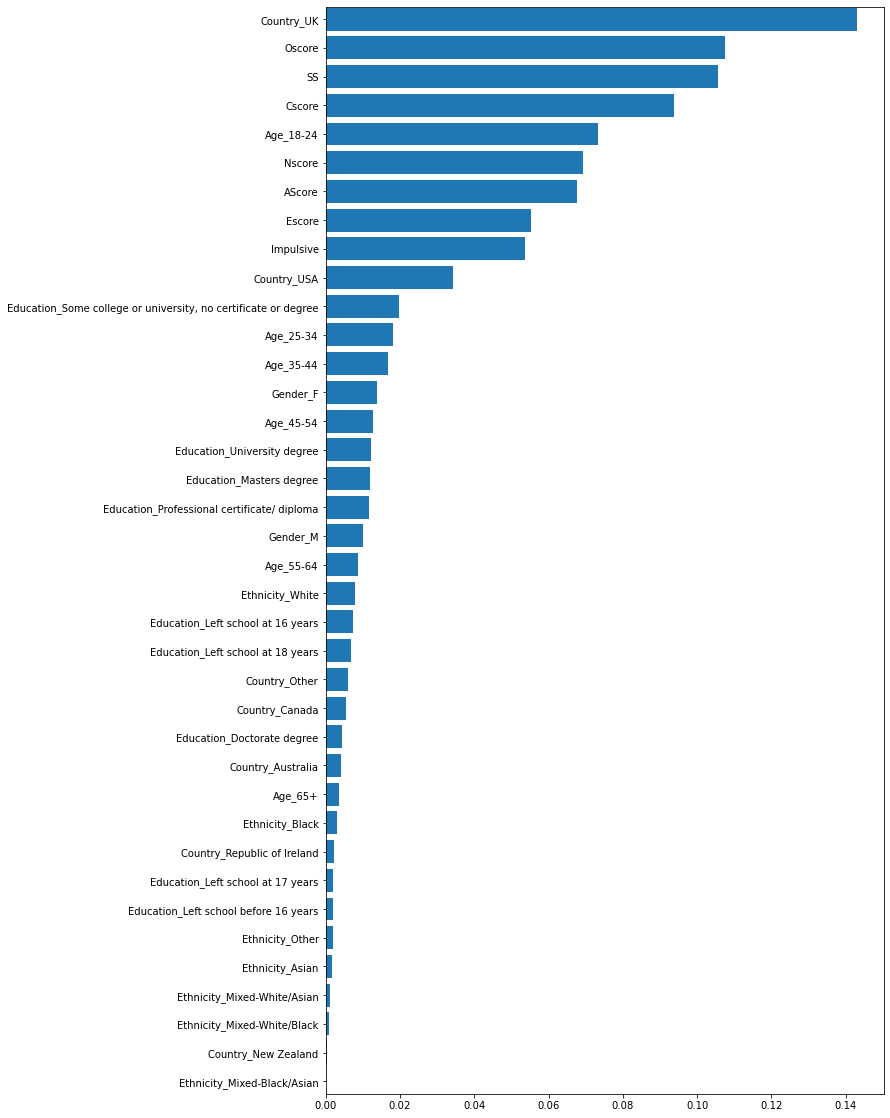

In [21]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf

LogisticRegression()

In [23]:
# fit the logisticregression model
clf.fit(X_train, y_train)

LogisticRegression()

In [24]:
# score the training and test models and print the scores
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 0.8045486851457001
Testing Data Score: 0.8166311300639659


## Try less features

In [25]:
df1 = df.drop(['Ethnicity'], axis=1)
df1

,Age,Gender,Education,Country,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,illegal_use
0,25-34,M,Doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,35-44,M,Professional certificate/ diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,18-24,F,Masters degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
3,35-44,F,Doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,65+,F,Left school at 18 years,Canada,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1871,18-24,F,"Some college or university, no certificate or ...",USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1872,18-24,M,"Some college or university, no certificate or ...",USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1873,25-34,F,University degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1874,18-24,F,"Some college or university, no certificate or ...",USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [26]:
# create list of dtypes to help determine unique values
df1_cat=df1.dtypes[df1.dtypes == "object"].index.tolist()

In [27]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df1 = pd.DataFrame(enc.fit_transform(df1[df1_cat]))

# Add the encoded variable names to the dataframe
encode_df1.columns = enc.get_feature_names_out(df1_cat)
encode_df1

,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_F,Gender_M,Education_Doctorate degree,Education_Left school at 16 years,...,Education_Professional certificate/ diploma,"Education_Some college or university, no certificate or degree",Education_University degree,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1873,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1874,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# merge original df and encoded and then drop the categorical columns to leave only numerical columns
df1_merge = df1.merge(encode_df1, left_index=True, right_index=True)
df1_merge = df1_merge.drop(df1_cat, axis='columns')
df1_merge.head()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,illegal_use,Age_18-24,Age_25-34,...,Education_Professional certificate/ diploma,"Education_Some college or university, no certificate or degree",Education_University degree,Country_Australia,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# create dataframe for variable X
df1_pre = df1_merge.drop("illegal_use", axis = 1)

In [30]:
# split data
X = df1_pre
y = df["illegal_use"]

In [31]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

In [32]:
# scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
clf = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.814498933901919


In [34]:
feature_importances = clf.feature_importances_

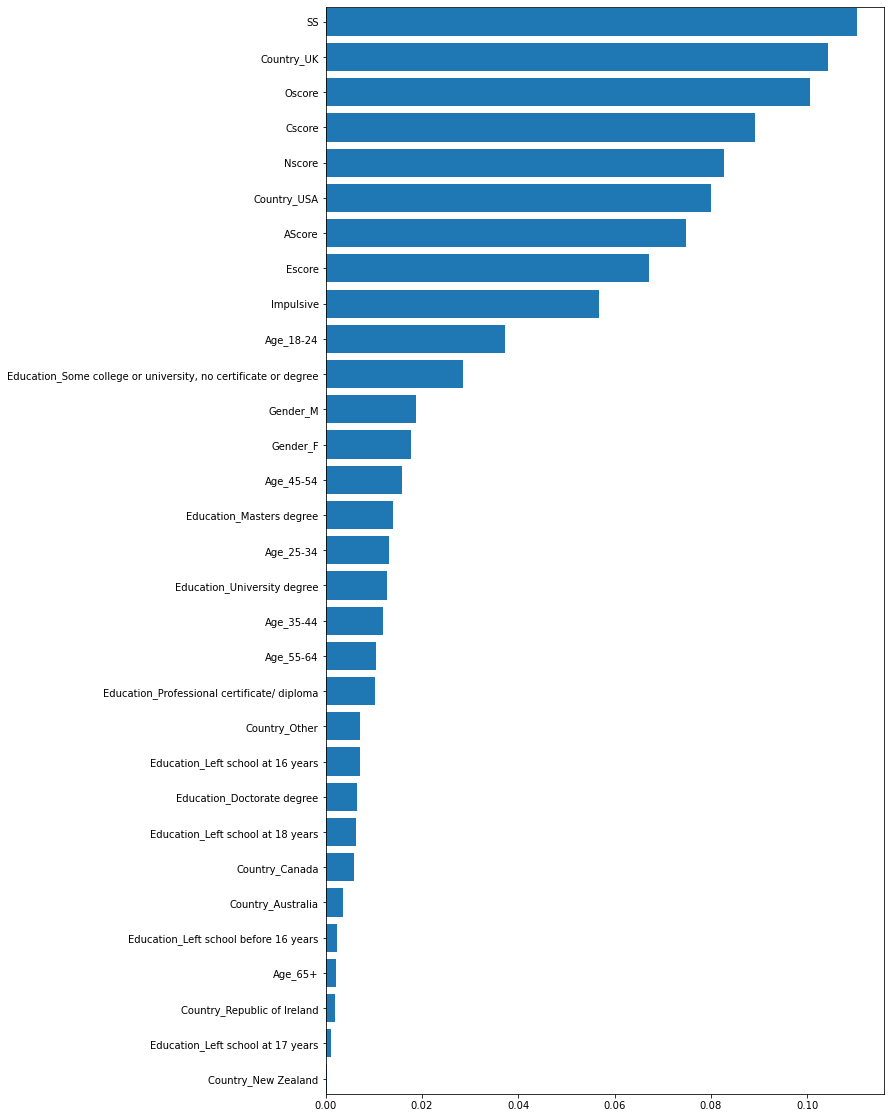

In [35]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [36]:
clf = LogisticRegression()
clf

LogisticRegression()

In [37]:
clf.fit(X_train, y_train)

LogisticRegression()

In [38]:
# score the training and test models and print the scores
print(f"Training Data Score: {clf.score(X_train, y_train)}")
print(f"Testing Data Score: {clf.score(X_test, y_test)}")

Training Data Score: 0.8052594171997157
Testing Data Score: 0.8187633262260128


k: 1, Train/Test Score: 1.000/0.733
k: 3, Train/Test Score: 0.857/0.768
k: 5, Train/Test Score: 0.829/0.793
k: 7, Train/Test Score: 0.809/0.806
k: 9, Train/Test Score: 0.805/0.797
k: 11, Train/Test Score: 0.804/0.793
k: 13, Train/Test Score: 0.795/0.789
k: 15, Train/Test Score: 0.788/0.774
k: 17, Train/Test Score: 0.787/0.774
k: 19, Train/Test Score: 0.783/0.770


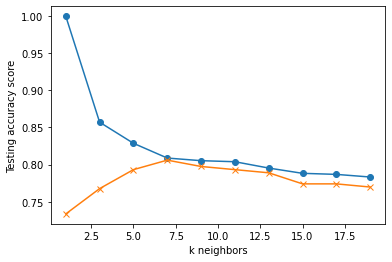

In [39]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.793
